<font size = 8> Data Compression with SVD

***

## Libraries & Stuff

In [1]:
import numpy as np

In [ ]:
import torch

In [ ]:
import tensorflow as tf

In [7]:
import matplotlib.pyplot as plt

.DS_Store files

find .  -name ".DS_Store" -depth -exec rm {} \;

In [8]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

In [2]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

***

In [2]:
from PIL import Image

The section features code adapted from [Frank Cleary's](https://gist.github.com/frankcleary/4d2bd178708503b556b0).

In [6]:
# course photo

In [3]:
! wget https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg

--2022-08-08 11:21:07--  https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 419564 (410K) [image/jpeg]
Saving to: 'oboe-with-book.jpg'

oboe-with-book.jpg  100%[===================>] 409.73K  --.-KB/s    in 0.1s    

2022-08-08 11:21:07 (3.12 MB/s) - 'oboe-with-book.jpg' saved [419564/419564]



In [5]:
# my photo uploaded on github

In [4]:
! wget https://github.com/gaurav8936/GN-ML-foundations/blob/main/98.Misc/01.Photo%20-%20ImageCompression%2C%20SVD/2013-04-24%2000.09.25.jpg

--2022-08-08 11:26:52--  https://github.com/gaurav8936/GN-ML-foundations/blob/main/98.Misc/01.Photo%20-%20ImageCompression%2C%20SVD/2013-04-24%2000.09.25.jpg
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: '2013-04-24 00.09.25.jpg'

2013-04-24 00.09.25     [ <=>                ] 136.70K  --.-KB/s    in 0.1s    

2022-08-08 11:26:53 (1.02 MB/s) - '2013-04-24 00.09.25.jpg' saved [139976]



In [11]:
! wget https://github.com/gaurav8936/GN-ML-foundations/blob/main/98.Misc/01.Photo%20-%20ImageCompression%2C%20SVD/sample01.jpg

--2022-08-08 11:29:38--  https://github.com/gaurav8936/GN-ML-foundations/blob/main/98.Misc/01.Photo%20-%20ImageCompression%2C%20SVD/sample01.jpg
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'sample01.jpg'

sample01.jpg            [ <=>                ] 135.93K  --.-KB/s    in 0.1s    

2022-08-08 11:29:38 (1.03 MB/s) - 'sample01.jpg' saved [139194]



***

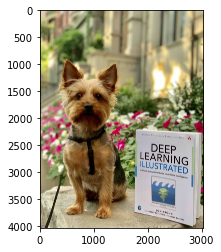

In [9]:
img = Image.open('oboe-with-book.jpg')
_ = plt.imshow(img)

In [14]:
img = Image.open('sample01.jpg')

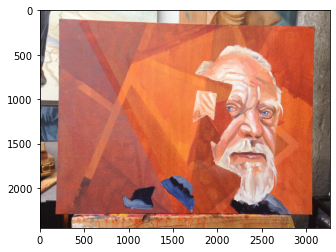

In [15]:
_ = plt.imshow(img)